# Homework PS3


## A simple classification task with Naive Bayes classifier & ROC curve

## Part 0:

Read and run each cell of the example. 

### Setup

In [2]:
%matplotlib notebook
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import seaborn as sn
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."

CHAPTER_ID = 'Naive Bayesian'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 1. Sythetic Datasets

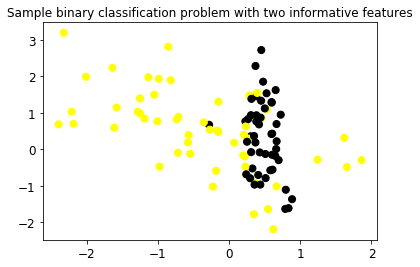

In [3]:
# synthetic dataset for classification (binary)

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

plt.figure()
plt.title('Sample binary classification problem with two informative features')

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker= 'o', c=y, s=50, cmap=cmap_bold)
plt.show()

## Naive Bayes classifiers

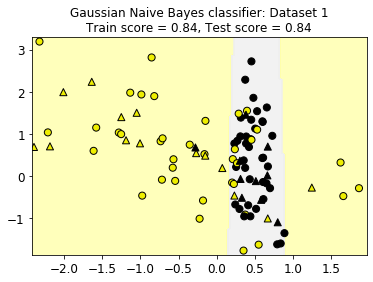

In [4]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)

plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')

In [5]:
nbclf.score(X_test, y_test)

0.84

In [6]:
y_pred = nbclf.predict(X_test)

# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

[[12  3]
 [ 1  9]]


In [7]:
# Print classification report
target_names = ['Class 0', 'Class 1']

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

     Class 0       0.92      0.80      0.86        15
     Class 1       0.75      0.90      0.82        10

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25



## ROC Curve

Accuracy =  0.8600000000000001


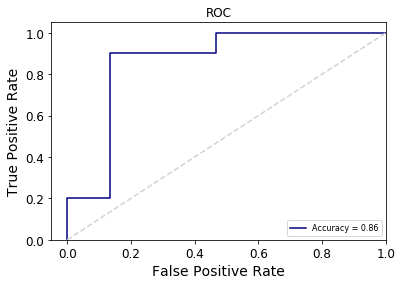

In [8]:
from sklearn.metrics import roc_curve, auc
y_score = nbclf.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)
print('Accuracy = ', roc_auc)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 2. Application to a real-world dataset¶

- Breast Canver dataset


In [52]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

print(X_cancer)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [10]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train2, y_train2)

print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train2, y_train2)))

print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test2, y_test2)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


### accuracy in training dataset

In [11]:
y_pred2 = nbclf.predict(X_train2)


target_names = list(cancer.target_names)
# plot a confusion matrix
confusion_mat = confusion_matrix(y_train2, y_pred2)

print(confusion_mat)

# Print classification report


result_metrics = classification_report(y_train2, y_pred2, target_names=target_names)

print(result_metrics)

[[142  17]
 [  4 263]]
              precision    recall  f1-score   support

   malignant       0.97      0.89      0.93       159
      benign       0.94      0.99      0.96       267

    accuracy                           0.95       426
   macro avg       0.96      0.94      0.95       426
weighted avg       0.95      0.95      0.95       426



### accuracy in testing dataset

In [12]:
y_pred2 = nbclf.predict(X_test2)


target_names = list(cancer.target_names)

# plot a confusion matrix
print(confusion_mat)

# Print classification report
result_metrics = classification_report(y_test2, y_pred2, target_names=target_names)

print(result_metrics)

[[142  17]
 [  4 263]]
              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        53
      benign       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



### ROC Curve

Accuracy =  0.990146750524109


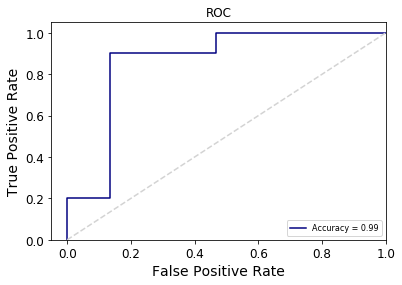

In [13]:
from sklearn.metrics import roc_curve, auc
y_score2 = nbclf.predict_proba(X_test2)

false_positive_rate2, true_positive_rate2, thresholds = roc_curve(y_test2, y_score2[:,1])

roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
print('Accuracy = ', roc_auc2)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc2))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Part 1

- Dataset: iris.csv is stored in a folder data

- Your modeling analysis should be done on two different datasets, (1) the original dataset and (b) Normalized data using min-max normalization. 

- Apply (1) k-NN classifier (using k = 1, 3, 5) and (2) Naive Bayes classifiers 

- A framework of k-cross validation (k = 10)

- Display confusion matrix (a matrix with numbers)

- Print a summary of performance metrics

- Plot ROC curves



### Load the dataset

In [16]:
iris = pd.read_csv("./data/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [17]:
# create lookup dict for class -> species name
iris_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

In [18]:
X = iris[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]
y = iris["Class"]

In [19]:
# create normalized dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## k-NN 

#### Original dataset

In [23]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from adspy_shared_utilities import plot_two_class_knn
for n in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors = n)
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"k: {n}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=iris_names))
    print()

k: 1
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38


k: 3
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38


k: 5
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-s

In [25]:
# k-cross validation
from sklearn.model_selection import KFold

knn = KNeighborsClassifier(n_neighbors = 3)
kf = KFold(n_splits=10, shuffle=True)
X = X.to_numpy()
precision_sum = recall_sum = accuracy_sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=iris_names))
    print()

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00         3

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       1.00      1.00      1.00         3
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00         4
 Iris-virginica       

### Normalized data set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
for n in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors = n)
    
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    print(f"k: {n}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=iris_names))
    print()

k: 1
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38


k: 3
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38


k: 5
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-s

In [27]:
knn = KNeighborsClassifier(n_neighbors = 3)
kf = KFold(n_splits=10, shuffle=True)
precision_sum = recall_sum = accuracy_sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    print(classification_report(y_test, y_pred, target_names=iris_names))
    print()

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      1.00      1.00         2
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      1.00      1.00         4
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       

## Naive-Bayes

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

nbclf = GaussianNB().fit(X_train, y_train)

nbclf.score(X_test, y_test)


1.0

In [53]:
y_pred = nbclf.predict(X_train)


target_names = list(iris_names)
# plot a confusion matrix
confusion_mat = confusion_matrix(y_train, y_pred)

print(confusion_mat)

# Print classification report


result_metrics = classification_report(y_train, y_pred, target_names = target_names)

print(result_metrics)

[[37  0  0]
 [ 0 31  3]
 [ 0  3 38]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.91      0.91      0.91        34
 Iris-virginica       0.93      0.93      0.93        41

       accuracy                           0.95       112
      macro avg       0.95      0.95      0.95       112
   weighted avg       0.95      0.95      0.95       112



In [54]:
y_pred = nbclf.predict(X_test)

# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



### Normalized Data

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nbclf = GaussianNB().fit(X_train_scaled, y_train)

nbclf.score(X_test_scaled, y_test)

1.0

In [56]:
y_pred = nbclf.predict(X_train_scaled)


target_names = list(iris_names)
# plot a confusion matrix
confusion_mat = confusion_matrix(y_train, y_pred)

print(confusion_mat)

# Print classification report


result_metrics = classification_report(y_train, y_pred, target_names = target_names)

print(result_metrics)

[[37  0  0]
 [ 0 31  3]
 [ 0  3 38]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.91      0.91      0.91        34
 Iris-virginica       0.93      0.93      0.93        41

       accuracy                           0.95       112
      macro avg       0.95      0.95      0.95       112
   weighted avg       0.95      0.95      0.95       112



In [57]:
y_pred = nbclf.predict(X_test_scaled)

# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [77]:
y_score = nbclf.predict(X_test)

n_classes = 3

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], thresholds = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    print('Accuracy = ', roc_auc)

# Plotting
for i in range(n_classes):
    plt.title('ROC')
    plt.plot(false_positive_rate[i], true_positive_rate[i], c=color, label=('Accuracy = %0.2f'%roc_auc[i]))
    plt.legend(loc='lower right', prop={'size':8})
    plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
    plt.xlim([-0.05,1.0])
    plt.ylim([0.0,1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

ValueError: Can only tuple-index with a MultiIndex

## Submissions

- Upload your notebook on GitHub repo and provide an URL to the file.

- Write a summary of the analysis and submit it to Canvas. Your summary should include the comparisons of the two models and the model peformance based on parameters (e.g., k value in k-NN classifier).


Summary:
For the kNN model, on both the normalized and original datasets, changing the k value did not have an impact on the outcomes and how well the model performed.

The K-cross validation had several perfect models on both the normalized and original datasets. In contrast, the Naive-Bayes model only performed perfectly on the test data while not performing perfeclty on the training data. 

Normalization of the data did not appear to have a large impact on the models used over this data set.